# Sentiment Analysis: Utilização do pacote NLTK para a Análise de Sentimentos no Python


## Pré-processamento

### Imports

In [ ]:
# pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import sent_tokenize, word_tokenize # Tokenizing
from nltk.probability import FreqDist # Frequencias das palavras
from nltk.corpus import stopwords # Stopwords
from nltk.stem import PorterStemmer # Stemming
from nltk.stem.wordnet import WordNetLemmatizer # Lemmatization

import re
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


### Tokenizing 

Usando como exemplo o texto: "Hello Mr. Smith, how are you doing today? The weather is great, and city is awesome. The sky is pinkish-blue. You shouldn't eat cardboard"

Podemos quebrá-lo em palavras utilizando a função `word_tokenize`:


In [ ]:
text = """Hello Mr. Smith, how are you doing today? 
  The weather is great, and city is awesome.
  The sky is pinkish-blue. You shouldn't eat cardboard
"""
tokenized_text = word_tokenize(text)
print(tokenized_text)

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']


Ou podemos separar por sentença utilizando a `sent_tokenize`: 

In [ ]:
tokenized_text2 = sent_tokenize(text)
print(tokenized_text2)

['Hello Mr. Smith, how are you doing today?', 'The weather is great, and city is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard"]


A separação por sentença é utilizada quando leva-se em conta a dependência da ordem das palavras. Nesse estudo, consideramos que a palavra terá o mesmo significado independente da posição que estiver, por isso, usaremos a separação por palavra.

### Lemmatization e Stemming

A lemmatization pode ser feita através do `WordNetLemmatizer().lemmatize()` e o stemming através do `PorterStemmer().stem()`. Os dois pertencem à biblioteca NLTK.

In [ ]:
# Stemming
ps = PorterStemmer()
stemmed_words = [ps.stem(w) for w in tokenized_text]
print("Stemming words:")
print(stemmed_words)

# Lemmatization
lem = WordNetLemmatizer()
lemmed_words = [lem.lemmatize(word, "v") for word in tokenized_text]
print("Lemmatization words:")
print(lemmed_words)


Stemming words:
['hello', 'mr.', 'smith', ',', 'how', 'are', 'you', 'do', 'today', '?', 'the', 'weather', 'is', 'great', ',', 'and', 'citi', 'is', 'awesom', '.', 'the', 'sky', 'is', 'pinkish-blu', '.', 'you', 'should', "n't", 'eat', 'cardboard']
Lemmatization words:
['Hello', 'Mr.', 'Smith', ',', 'how', 'be', 'you', 'do', 'today', '?', 'The', 'weather', 'be', 'great', ',', 'and', 'city', 'be', 'awesome', '.', 'The', 'sky', 'be', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']


Podemos ver que nos dois casos a palavra "doing" se tornou "do". Entretando, as palavras "is" e "are" no *stemming* continuaram a mesma, enquanto que no *lemmatization* as duas viraram "be".

Portanto, por conta do *lemmatization* pegar o núcleo da palavra, ele é a mais recomendado para uma análise mais precisa.

### Stopwords

Aqui determinamos as palavras que iremos tirar do estudo. No pacote ***NLTK*** já temos um banco de dados com as stopwords: `stopwords.words("english")`.

In [ ]:
stop_words = list(stopwords.words("english"))
stop_words[0:5]

['i', 'me', 'my', 'myself', 'we']

### Data Cleaning

Nessa parte nós tiramos caracteres especiais, deixamos todas as palavras minúsculas e tiramos espaços em branco. Aqui usamos o pacote ***re*** do python, que nos permite trabalhar com string facilmente.

In [ ]:
processed_features = []

for word in lemmed_words:
    # Remove todos os caracteres especiais, incluindo numeros
    processed_feature = re.sub(r'\W', ' ', str(word))
    # Converte para minusculo
    processed_feature = processed_feature.lower()
    # Tira espaços em branco multiplos
    processed_feature = re.sub(r'\s+', '', processed_feature, flags=re.I)
    # Adcionar na lista
    if processed_feature not in stop_words and processed_feature != '':
      processed_features.append(processed_feature)
print(processed_features)


['hello', 'mr', 'smith', 'today', 'weather', 'great', 'city', 'awesome', 'sky', 'pinkishblue', 'nt', 'eat', 'cardboard']


### Função com tudo junto

Juntando todos as funções que aprendemos para formar uma só, facilitando na hora de alterar todas as frases.

In [ ]:
def frase_limpa(text):
  lem = WordNetLemmatizer()
  stop_words = list(stopwords.words("english"))

  tokenized_text = word_tokenize(text)
  processed_features = []
  for word in tokenized_text:
    # Remove todos os caracteres especiais, incluindo numeros
    processed_feature = re.sub('[^a-zA-Z]', ' ', str(word))
    # Lemmatization
    processed_feature = lem.lemmatize(processed_feature, "v")
    # Converte para minusculo
    processed_feature = processed_feature.lower()
    # Tira espaços em branco multiplos
    processed_feature = re.sub(r'\s+', '', processed_feature, flags=re.I)
    # Adcionar na lista
    if processed_feature not in stop_words and processed_feature != '':
      processed_features.append(processed_feature)
  clean_phrase = ' '.join(x for x in processed_features)
  return clean_phrase

In [ ]:
print(frase_limpa("9485jná-f fisje ikj53n").split())

['jnf', 'fisje', 'ikjn']


## Exemplo com uma base de reviews

Depois de ver como tratar o texto no Python, faremos isso para uma base real. 

Essa base originalmente continha mais de 500 mil linhas, entretando, tivemos problemas computacionais e resolvemos trabalhar com as primeiras 50 mil linhas. [Download da base.](https://www.kaggle.com/snap/amazon-fine-food-reviews?select=Reviews.csv)

A base de dados contém reviews de *Fine Food* coletada da *Amazon*, site de compras. Nessa base temos as colunas:
 - **ID**: ID da linha;
 - **ProductID**: ID do produto;
 - **UserId**: ID do usuário; 
 - **ProfileName**: nome do usuário; 
 - **HelpfulnessNumerator** e **HelpfulnessDenominator**: número de usuários que acharam o review útil; 
 - **Score**: escore do review;
 - **Time**: tempo do review de outubro de 1999 até outubro de 2012;
 - **Summary**: resumo do review;
 - **Text**: o review. 
 
 Nós classificamos o escore (**Score**) como:
1. Negativo
2. Pouco negativo
3. Neutro
4. Pouco positivo
5. Positivo  

O objetivo é pegar novos reviews sem escore e classificá-los com base nas palavras escritas na avaliação.

### Leitura e análise dos dados

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/luckermos/databases/main/SentimentAnalysis/Reviews.csv')
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
49995,49996,B00430B73W,AKW867T7C6HF8,HWJ3,0,0,5,1261180800,Grown to really like them,My sister introduced me to these. They have be...
49996,49997,B00430B73W,A2PEHNEDMHOYTW,L. Allen,0,0,5,1258934400,Healthy Snack at a great price!,A friend recommended these bars and I fell in ...
49997,49998,B00430B73W,A2QH2KF2IAB143,"J. A. Meyers ""Jan""",0,0,5,1257379200,Raw Revolution Hazelnut Cashew,Fabulous! I take one to work with me every da...
49998,49999,B00430B73W,AMX286UGXISMA,Aaron Dragushan,0,0,4,1247702400,"fantastic, but chew carefully",I love these bars and will continue to buy the...


Tiraremos do modelo as variáveis: ***Id, ProductId, UserId, ProfileName, HelpfulnessNumerator, HelpfulnessDenominator, Score, Time*** porque não são relevantes para essa análise. 

***Summary e Text*** são as frases e ***Score*** é a variável resposta que indica o sentimento expresso pela frase.

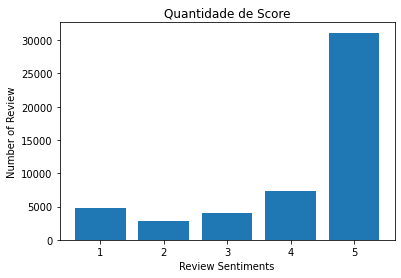

In [ ]:
Sentiment_count = data.groupby('Score').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Text'])
plt.title("Quantidade de Score")
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

A maioria das frases são **positivas**. E parece haver um desequilíbrio entre avaliações positivas e negativas, temos muito mais review positivos do que negativos. Portanto, as clases estão desbalanceadas e isso pode ser um problema para o modelo.

### Pré-Processamento


Nessa parte, juntamos as duas colunas de texto, fazemos todo o pré-processamento dito anteriormente para deixar o texto "limpo" e removemos linhas duplicadas da tabela.

In [ ]:
# "Limpando" as frases
data['Phrase'] = data["Summary"] + " " + data["Text"]
data['Phrase'] = data['Phrase'].map(lambda x: frase_limpa(str(x)))
data = data.filter(items=['Phrase', 'Score']).drop_duplicates()[data['Phrase'] != ""]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


### Base de Treino e Teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data['Phrase'], data['Score'], test_size=0.25, random_state=123)

#### Bag of Word

In [ ]:
# Usado para fazer a bag of word
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train) # para teste vectorizer.transform(newdata)
print("Tamanho de matrix de treino:")
print(X_train.shape)
print("\nCada coluna da matrix conta o número de vezes que a palavra aparece:")
print(vectorizer.get_feature_names()[0:10], end=" ")
print("...")
# Teste
X_test = vectorizer.transform(X_test)

Tamanho de matrix de treino:
(34710, 38184)

Cada coluna da matrix conta o número de vezes que a palavra aparece:
['aa', 'aaa', 'aaaa', 'aaaaaaaaaaaaaaa', 'aaaaaaahhhhhh', 'aaaaaawwwwwwwwww', 'aaaaahhh', 'aaaand', 'aaaarrrrrgggghhhhh', 'aaaccchhh'] ...


Podemos observar que temos mais mais variáveis do que observações. Neste caso, temos dependência entre as colunas. Isso acontece por termos muitas palavras distintas nos textos.

### Ajuste do Modelo



#### Naive Bayes Multinomial

Iremos utilizar o algoritmo de classificação Naive Bayes Multinomial



In [ ]:
model_NB = MultinomialNB().fit(X_train, y_train)
predicted = model_NB.predict(X_test)
print("Acurácia:",metrics.accuracy_score(y_test, predicted))

Acurácia: 0.6866303690260133


Obtivemos a primeira acurácia, agora iremos compará-la com os outros modelos.


#### SVM

Utilizando o *Support Vector Machine* para classificação:

In [ ]:
from sklearn.svm import SVC

model_SVM = SVC().fit(X_train, y_train)
predicted = model_SVM.predict(X_test)
print("Acurácia:",metrics.accuracy_score(y_test, predicted))

Acurácia: 0.6977789300838303


Esse modelo obteve resultados um pouco melhores do que o de Bayes, entretanto, iremos olhar outros modelos também.

#### Random Forest

A procura de um modelo melhor, será testado o algoritmo *Random Forest*.

In [ ]:
model_rf = RandomForestClassifier().fit(X_train, y_train)
#param = {}
#gs = GridSearchCV(model_rf, param, cv = 5, n_jobs = -1)
#model_rf = gs.fit(X_train, y_train)
predicted = model_rf.predict(X_test)
print("Acurácia:",metrics.accuracy_score(y_test, predicted))

Acurácia: 0.6517154956356408


O resultado obtido foi menos adequado que o anterior.

#### Rede Neural


Agora, uma rede neural será treinada:

In [ ]:
clf = AdaBoostClassifier(n_estimators=1000, random_state=1, learning_rate=0.6).fit(X_train, y_train)
predicted = clf.predict(X_test)
print("Acurácia:",metrics.accuracy_score(y_test, predicted))


Acurácia: 0.702618615504278


A rede neural com a taxa de aprendizagem igual a 0.6 foi o melhor modelo obtido, resultando em uma acurácia igual a 70% aproximadamente. 

#### Métricas para o modelo final

Como a Rede Neural foi o modelo que deu maior acurácia, iremos usar ele como o modelo final. 

##### Matriz de confusão:

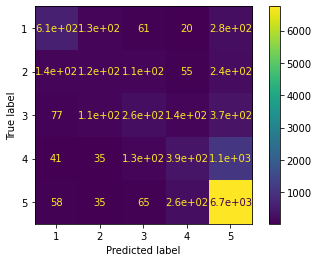

In [ ]:
metrics.confusion_matrix(y_test, predicted)
metrics.plot_confusion_matrix(clf, X_test, y_test)



Com a matriz de confusão podemos observar que a maioria dos  textos estão sendo classiicados como  sentimento **possitivo** (classe 5). Isso se deve ao fato da base estar desbalanceada.

In [ ]:
print(metrics.classification_report(predicted,y_test))

              precision    recall  f1-score   support

           1       0.56      0.66      0.60       928
           2       0.18      0.28      0.22       424
           3       0.27      0.42      0.33       618
           4       0.23      0.45      0.31       873
           5       0.94      0.77      0.85      8728

    accuracy                           0.70     11571
   macro avg       0.44      0.52      0.46     11571
weighted avg       0.79      0.70      0.74     11571



Por fim, podemos ver que conseguimos detectar bem as reviews  **positivas** e as **negativas**, sendo que para as positivas a precisão é próxima de 1. Entretando, a precisão das classificações um **pouco negativas**, **neutras** e um **pouco positivas** não foram boas, o modelo tem dificuldades para predizê-las.

Isso pode ocorrer por conta do desequilíbrio entre as classes monstrado na análise descritiva.

Para todas as classificações temos uma acurácia de 70%, que não é uma acurácia perfeita, mas é o suficiente para esse tipo de estudo.